In [6]:
pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-1r0mnr28
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-1r0mnr28
  Resolved https://github.com/huggingface/transformers.git to commit 006d9249ec0270ff6c4d3840979d23fe94bdc763
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.49.0.dev0-py3-none-any.whl size=10719709 sha256=777396d1f2f9e65c9ba9d4cc068becff5ff04599a7c167ed2c89812f6a28c2b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-w2e50_an/wheels/32/4b/78/f195c684dd3a9ed21f3b39fe8f85b48df7918581b6437be143
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.2
    Uninstalling transformers-4.48.2:
      Successfully uninstalled transformers-4.48.2


In [2]:
pip install torch

In [3]:
from transformers import AutoProcessor, AutoModelForImageTextToText
import torch

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = AutoModelForImageTextToText.from_pretrained("stepfun-ai/GOT-OCR-2.0-hf", device_map=device)
processor = AutoProcessor.from_pretrained("stepfun-ai/GOT-OCR-2.0-hf")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/439 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.2k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/18.7M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/213 [00:00<?, ?B/s]

In [5]:
image = "https://huggingface.co/datasets/hf-internal-testing/fixtures_got_ocr/resolve/main/image_ocr.jpg"
inputs = processor(image, return_tensors="pt").to(device)

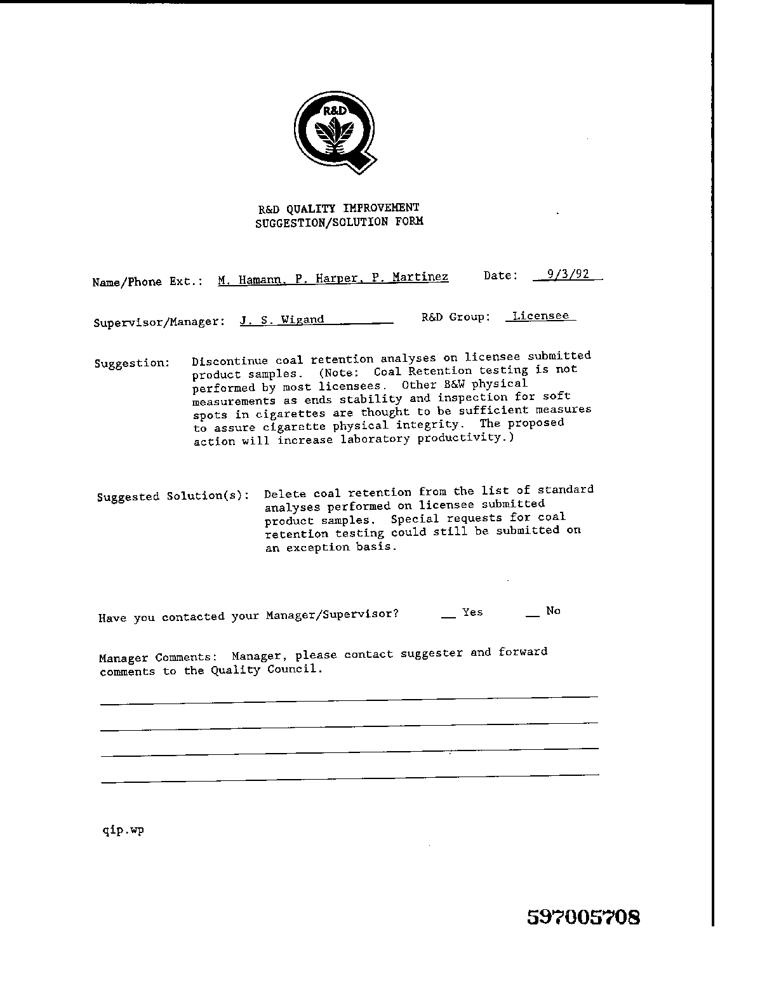

In [10]:
generate_ids = model.generate(
    **inputs,
    do_sample=False,
    tokenizer=processor.tokenizer,
    stop_strings="<|im_end|>",
    max_new_tokens=4096,
)

In [11]:
processor.decode(generate_ids[0, inputs["input_ids"].shape[1]:], skip_special_tokens=True)

'R&D QUALITY IMPROVEMENT\nSUGGESTION/SOLUTION FORM\nName/Phone Ext. : M. Hamann, P. Harper, P. Martinez\nDate: 9/3/92\nSupervisor/Manager: J. S. Wigand\nR&D Group: Licensee\nSuggestion:\nDiscontinue coal retention analyses on licensee submitted\nproduct samples. (Note: Coal Retention testing is not\nperformed by most licensees. Other B&W physical\nmeasurements as ends stability and inspection for soft\nspots in cigarettes are thought to be sufficient measures\nto assure cigarette physical integrity. The proposed\naction will increase laboratory productivity.)\nSuggested Solution(s) : Delete coal retention from the list of standard\nanalyses performed on licensee submitted\nproduct samples. Special requests for coal\nretention testing could still be submitted on\nan exception basis.\nHave you contacted your Manager/Supervisor?\nYes\nNo\nManager Comments: Manager, please contact suggester and forward\ncomments to the Quality Council.\nqip.wp\n597005708'

In [12]:
text = processor.decode(generate_ids[0], skip_special_tokens=True)

In [13]:
text

'system\nYou should follow the instructions carefully and explain your answers in detail.user\n\n OCR: assistant\nR&D QUALITY IMPROVEMENT\nSUGGESTION/SOLUTION FORM\nName/Phone Ext. : M. Hamann, P. Harper, P. Martinez\nDate: 9/3/92\nSupervisor/Manager: J. S. Wigand\nR&D Group: Licensee\nSuggestion:\nDiscontinue coal retention analyses on licensee submitted\nproduct samples. (Note: Coal Retention testing is not\nperformed by most licensees. Other B&W physical\nmeasurements as ends stability and inspection for soft\nspots in cigarettes are thought to be sufficient measures\nto assure cigarette physical integrity. The proposed\naction will increase laboratory productivity.)\nSuggested Solution(s) : Delete coal retention from the list of standard\nanalyses performed on licensee submitted\nproduct samples. Special requests for coal\nretention testing could still be submitted on\nan exception basis.\nHave you contacted your Manager/Supervisor?\nYes\nNo\nManager Comments: Manager, please conta

In [15]:
from transformers import pipeline

In [16]:
qna = pipeline("question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda:0


In [18]:
qna(
    question="what is the date of the document?",
    context=text
)

{'score': 0.6950666904449463, 'start': 216, 'end': 222, 'answer': '9/3/92'}

In [19]:
qna(
    question="what is the suggestion of the document?",
    context=text
)

{'score': 0.15706095099449158,
 'start': 621,
 'end': 658,
 'answer': 'will increase laboratory productivity'}

In [22]:
qna(
    question="is the document signed?",
    context=text
)

{'score': 0.001486312597990036,
 'start': 1031,
 'end': 1047,
 'answer': 'qip.wp\n597005708'}

In [20]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda:0


In [21]:
summarizer(text)

[{'summary_text': ' Coal Retention testing is not currently performed by most licensees . The proposed action will increase laboratory productivity . Special requests for coal-retention testing could still be submitted on an exception basis . Have you contacted your Manager/Supervisor? Please contact suggester and forward comments to the Quality Council .'}]